In [13]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import tensorflow as tf
from keras.models import load_model
import time

In [14]:
model = load_model('imageclassifier.keras')
password_sequence = ['Happy', 'Sad', 'Sad']

In [15]:
def handle_user_feedback():
    print("Was the password prediction wrong? (Y/N)")
    user_input = input().strip().lower()
    return user_input == 'y'

def handle_incorrect_prediction():
    global model
    print("Would you like to provide correct labels for the frames? (Y/N)")
    user_feedback = input().strip().lower()
    if user_feedback == 'y':
        print("Please provide correct labels for the frames ('Happy' or 'Sad'):")
        correct_labels = []
        for i in range(3):
            label = input(f"Frame {i+1}: ").strip().capitalize()
            if label not in ['Happy', 'Sad']:
                print("Invalid input. Please enter 'Happy' or 'Sad'.")
                return handle_incorrect_prediction()
            correct_labels.append(label)
        retrain_model(correct_labels)

def retrain_model(correct_labels):
    global model, captured_frames, current_sequence
    correct_labels_numeric = [1 if label == 'Happy' else 0 for label in correct_labels]
    current_sequence = correct_labels
    for frame, label in zip(captured_frames, correct_labels_numeric):
        preprocessed_frame = preprocess_frame(frame)
        model.train_on_batch(preprocessed_frame, np.array([label]))
    model.save("imageclassifier.keras")
    print("model saved")


In [16]:
def display_frames(frames):
    for i, frame in enumerate(frames):
        plt.figure(figsize=(5, 5))
        plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        plt.title(f"Frame {i+1}")
        plt.axis('off')
        plt.show()

Step: 1/3 - Time until next photo: 4 seconds
Step: 2/3 - Time until next photo: 0 seconds
Step: 3/3 - Time until next photo: -4 seconds
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
Current sequence: ['Sad']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Current sequence: ['Sad', 'Sad']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Current sequence: ['Sad', 'Sad', 'Sad']
Password incorrect. Access denied.


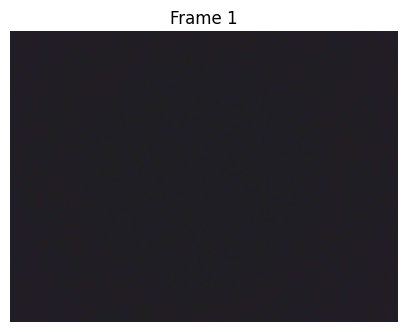

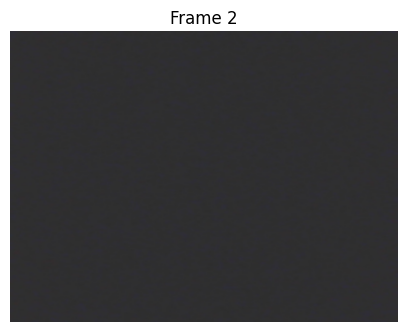

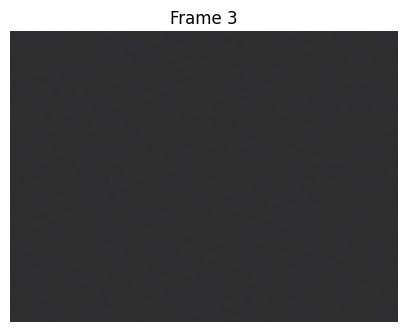

Was the password prediction wrong? (Y/N)


In [ ]:

captured_frames = []
current_sequence = []

def process_camera_feed():
    cap = cv2.VideoCapture(0)
    frame_count = 0
    
    while frame_count < 3:
        ret, frame = cap.read()
        if not ret:
            break
        
        step_info = "Step: {}/3 - Time until next photo: {} seconds".format(frame_count + 1, 4 - frame_count * 4)
        print(step_info)
        
        captured_frames.append(frame)
        frame_count += 1
        
        if frame_count < 3:
            time.sleep(2)
    
    cap.release()
    
    evaluate_frames()

def evaluate_frames():
    for frame in captured_frames:
        preprocessed_frame = preprocess_frame(frame)
        predicted_gesture = model.predict(preprocessed_frame)
        if predicted_gesture <= 0.5:
            gesture_label = "Happy"
        else:
            gesture_label = "Sad"
        current_sequence.append(gesture_label)
        print("Current sequence:", current_sequence)
    if current_sequence == password_sequence:
        print("Password recognized. Access granted!")
    else:
        print("Password incorrect. Access denied.")

def preprocess_frame(frame):
    resized_frame = cv2.resize(frame, (256, 256))
    resized_frame = resized_frame.astype(np.float32) / 255.0
    normalized_frame = np.expand_dims(resized_frame, axis=0)
    return normalized_frame

if __name__ == '__main__':
    process_camera_feed()
    display_frames(captured_frames)
    if current_sequence == password_sequence:
        print("Password recognized. Access granted!")
    else:
        if handle_user_feedback():
            handle_incorrect_prediction()
        else:
            print("Access denied.")
